In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import numpy as np
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torch.nn as nn
import utils as ut

BATCH_SIZE = 100
SHUFFLE = False
EPOCH = 30


transform_alexnet = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])

dataset_alexnet = CIFAR10(root='data/', download=True, transform=transform_alexnet)
test_data_alexnet = CIFAR10(root='data/', train=False, transform=transform_alexnet)

val_size = 5000
train_size = len(dataset_alexnet) - val_size

train_data_alexnet, val_data_alexnet = random_split(dataset_alexnet, [train_size, val_size])

train_loader_alexnet = DataLoader(train_data_alexnet, batch_size=BATCH_SIZE, shuffle=SHUFFLE)
val_loader_alexnet = DataLoader(val_data_alexnet, batch_size=BATCH_SIZE, shuffle=SHUFFLE)
test_loader_alexnet = DataLoader(test_data_alexnet, batch_size=BATCH_SIZE, shuffle=SHUFFLE)
torch.cuda.is_available()

Files already downloaded and verified


False

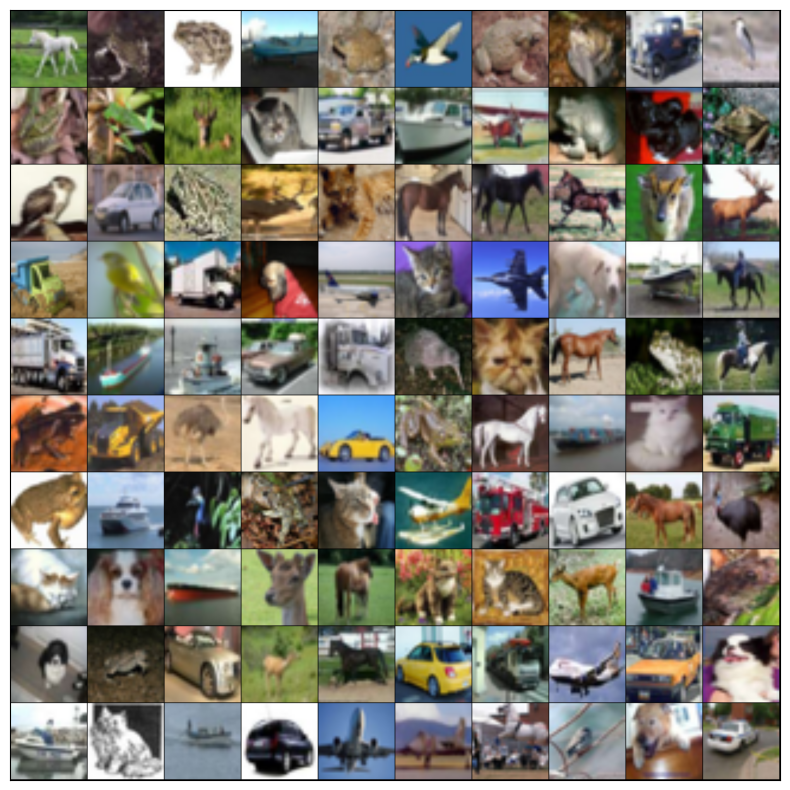

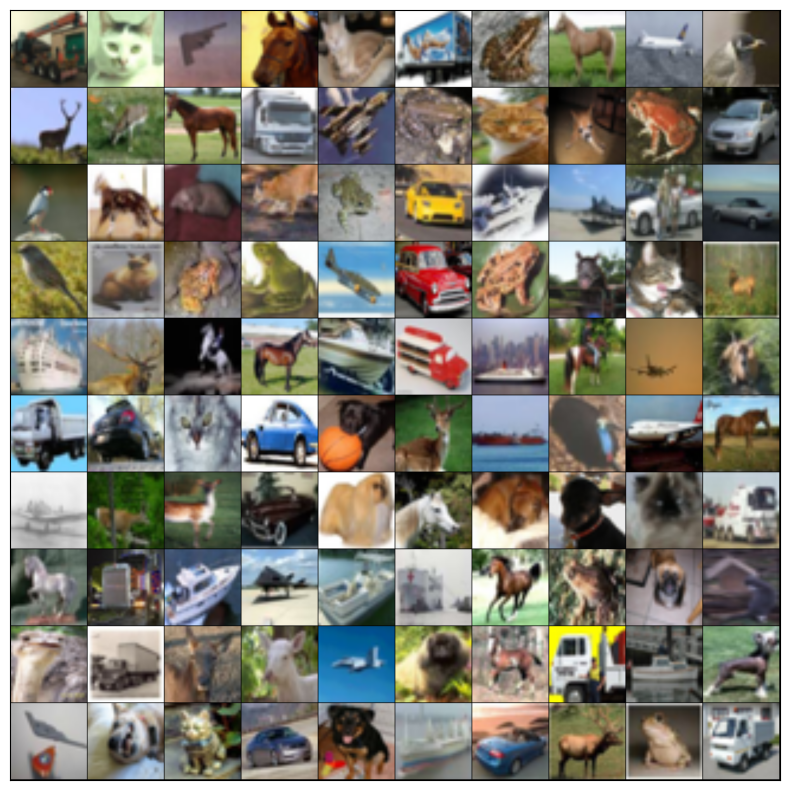

In [14]:
def show_batch(dl):
    for images,lables in dl:
        fig, ax = plt.subplots(figsize = (10,10))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,10).permute(1,2,0))
        break

# show a batch
show_batch(train_loader_alexnet)
show_batch(val_loader_alexnet)

In [15]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('runs/CIFAR10_4')

Epoch 0, training loss: 0.020339994184176126, validation loss: 0.017452025365829467
Train accuracy = 0.21735555555555555
Validation accuracy = 0.3382
Epoch 5, training loss: 0.012007802322175768, validation loss: 0.01180093913078308
Train accuracy = 0.5691777777777778
Validation accuracy = 0.5784
Epoch 10, training loss: 0.009086736170450846, validation loss: 0.009692075395584107
Train accuracy = 0.6796
Validation accuracy = 0.6636
Epoch 15, training loss: 0.007480086102088292, validation loss: 0.00926465505361557
Train accuracy = 0.7358666666666667
Validation accuracy = 0.6818
Epoch 20, training loss: 0.006214684529436959, validation loss: 0.008643989157676698
Train accuracy = 0.7822888888888889
Validation accuracy = 0.709
Epoch 25, training loss: 0.00543688071999285, validation loss: 0.008885723781585694
Train accuracy = 0.8106222222222222
Validation accuracy = 0.7114


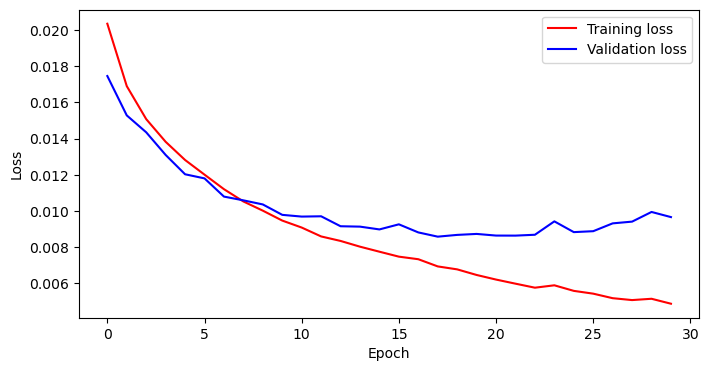

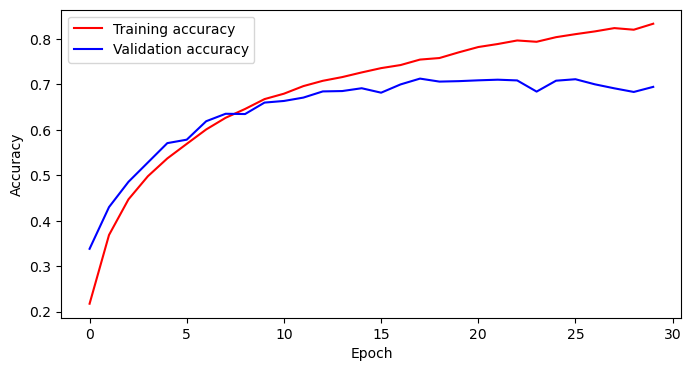

lowest loss for validation set: 0.008583954000473022, with an accuracy of 0.7128
Test accuracy is 70.0%.


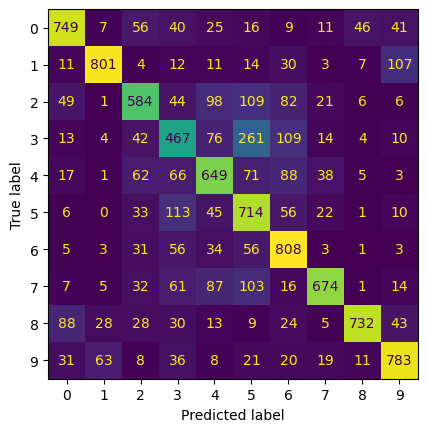

In [16]:
from torchvision.models import AlexNet

LEARNING_RATE = 0.001
epochs = EPOCH

model = AlexNet(num_classes = 10)

# Define our loss function
criterion = nn.CrossEntropyLoss()

# Define our optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
run_name = "AlexNet.pt"
# Train the model
model.to(device)
ut.train_model(model, criterion, optimizer, train_loader_alexnet, val_loader_alexnet, run_name, writer, epochs, device)
model = torch.load(run_name)
model.to(device)
ut.test_model(model, test_loader_alexnet, device)
